8 maggio 
azimuth parabola 253
azimuth vero 248
ora inizio 
ora fine 


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MinuteLocator, SecondLocator, DateFormatter
import pandas as pd

In [15]:
azimuth_min =  252.8
azimuth_max = 253.1

data_i = pd.to_datetime('2023-05-08 20:00:00', format = '%Y-%m-%d %H:%M:%S')
data_f = pd.to_datetime('2023-05-08 21:52:00', format = '%Y-%m-%d %H:%M:%S')
data_m = pd.to_datetime('2023-05-08 22:56:00', format = '%Y-%m-%d %H:%M:%S')

title = '08 maggio 2023, azimuth: 253'

file_parabola = 'TDA2023_05_08.txt'
file_ricevitore = '2023-05-08.txt'


In [16]:
parabola = pd.read_csv (file_parabola,
                           sep=';',
                           header=None,
                           comment='#')

ricevitore_10 = pd.read_csv (file_ricevitore,
                                sep = ' ',
                                header=None,
                                skiprows=11,
                                decimal='.',
                                names=['data','ora','rad','temperatura'])

In [17]:
parabola.rename(columns={0: 'day', 1: 'month', 2: 'year', 3: 'hour', 4: 'minute', 5: 'second', 9: 'azimuth', 10: 'elevazione'}, inplace = True)
parabola['data_ora'] = pd.to_datetime(parabola[["day", "month", "year", "hour", "minute", "second"]])
parabola = parabola.loc[:,['data_ora','elevazione','azimuth']]

In [18]:
mask_1 = parabola.azimuth <= azimuth_max
mask_2 = parabola.azimuth >= azimuth_min
mask_3 = parabola.data_ora >= data_i
mask_4 = parabola.data_ora <= data_f
parabola = parabola.loc[mask_1 & mask_2 & mask_3 & mask_4]
parabola.reset_index(inplace=True, drop=True)

In [19]:
while parabola.at[0,'elevazione'] > 20.1:
    parabola = parabola.drop(labels=0, axis=0)
    parabola.reset_index(inplace=True, drop=True)

KeyError: 0

In [20]:
ricevitore_10['data_ora'] = ricevitore_10['data'].map(str) + ' ' + ricevitore_10['ora'].map(str)
ricevitore_10['data_ora'] = pd.to_datetime(ricevitore_10['data_ora'], format = '%m/%d/%Y %H:%M:%S.%f')
ricevitore_10 = ricevitore_10.iloc[:,[-1,2,3]]

In [11]:
delta_time = pd.Timedelta(hours = 1)
mask_5 = ricevitore_10.data_ora >= parabola.iloc[0]['data_ora'] + delta_time
mask_6 = ricevitore_10.data_ora <= parabola.iloc[-1]['data_ora'] + delta_time
ricevitore_10 = ricevitore_10[mask_5 & mask_6]

In [12]:
parabola['data_ora'] = parabola.data_ora + 2*delta_time
ricevitore_10['data_ora'] = ricevitore_10.data_ora + delta_time

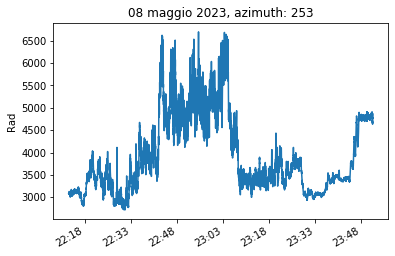

In [13]:
fig, ax = plt.subplots()
fig.autofmt_xdate()

ax.plot(ricevitore_10['data_ora'],ricevitore_10['rad'], label='temp')
ax.xaxis.set_major_formatter(DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(MinuteLocator(interval = 15))

plt.title(title)
plt.ylabel('Rad')
plt.show()